| **Inicio** | **atrás 7** | **Siguiente 9** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./7_Regresion_y_Correlacion.ipynb)| [⏩](./9_Metodos_Estadisticos_Avanzados.ipynb)|

# **8. Análisis de Varianza (ANOVA)**

## **ANOVA de un Factor**

### **Comparación de medias de más de dos grupos**

El ANOVA de un factor es una técnica estadística utilizada para comparar las medias de más de dos grupos. La hipótesis nula $(H_0)$ es que no hay diferencias significativas entre las medias de los grupos, y la hipótesis alternativa $(H_1)$ es que al menos una media es diferente.

**Fórmula y Conceptos Básicos:**

La fórmula general para el ANOVA de un factor es:

$F = \frac{\text{Varianza entre grupos}}{\text{Varianza dentro de grupos}}$

- La varianza entre grupos mide las diferencias promedio entre las medias de los grupos.
- La varianza dentro de grupos mide la variabilidad dentro de cada grupo.

**Ejemplo con Código Python:**

Supongamos que tenemos tres grupos de datos y queremos realizar un ANOVA para comparar sus medias.

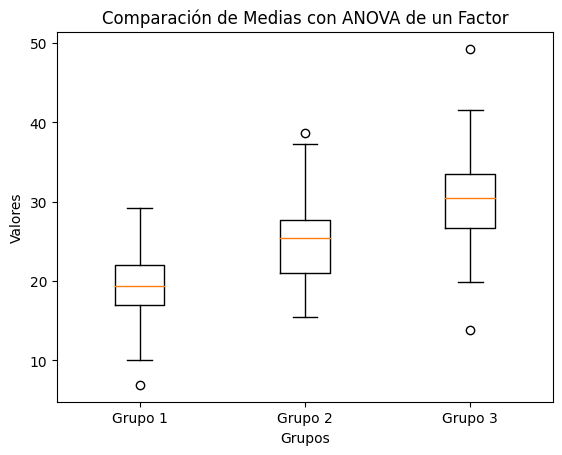

Estadístico F: 121.28597653339587
Valor p (ANOVA): 3.126091806231076e-39


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Crear datos ficticios para tres grupos
np.random.seed(42)
grupo1 = np.random.normal(20, 5, 100)
grupo2 = np.random.normal(25, 5, 100)
grupo3 = np.random.normal(30, 5, 100)

# Realizar ANOVA
stat_anova, p_value_anova = stats.f_oneway(grupo1, grupo2, grupo3)

# Visualización en gráfico de caja
plt.boxplot([grupo1, grupo2, grupo3], labels=['Grupo 1', 'Grupo 2', 'Grupo 3'])
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.title('Comparación de Medias con ANOVA de un Factor')
plt.show()

# Imprimir resultados
print(f"Estadístico F: {stat_anova}")
print(f"Valor p (ANOVA): {p_value_anova}")

En este ejemplo, hemos creado tres grupos de datos y aplicado ANOVA para comparar sus medias. El gráfico de caja ayuda a visualizar la distribución de los datos en cada grupo.

**Interpretación de Resultados:**

- **Estadístico F:**

  - Un estadístico F grande sugiere que al menos una de las medias es significativamente diferente.

- **Valor p:**

  - Un valor p pequeño (< 0.05) proporciona evidencia en contra de la hipótesis nula.

**Gráfico de Caja Personalizado:**

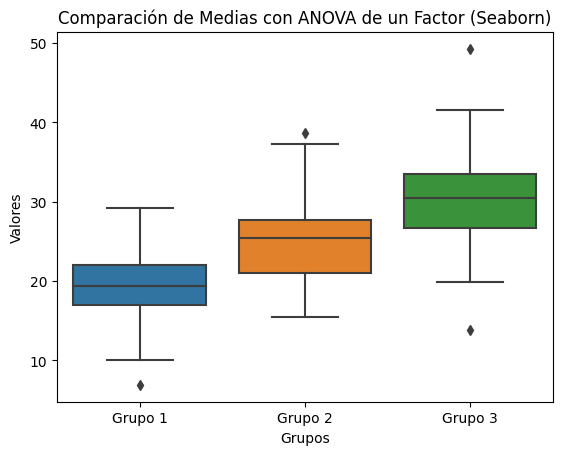

In [2]:
import seaborn as sns

# Crear un DataFrame para facilitar el uso de seaborn
import pandas as pd
df = pd.DataFrame({'Grupo 1': grupo1, 'Grupo 2': grupo2, 'Grupo 3': grupo3})

# Visualización con seaborn
sns.boxplot(data=df)
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.title('Comparación de Medias con ANOVA de un Factor (Seaborn)')
plt.show()

En este ejemplo, hemos utilizado Seaborn para crear un gráfico de caja más estilizado.

**Nota sobre la Asunción del ANOVA:**

El ANOVA asume que las muestras son independientes, las poblaciones tienen distribuciones normales y las varianzas son homogéneas (homocedasticidad). Si estas asunciones no se cumplen, se deben considerar ajustes o pruebas no paramétricas.

Recuerda que el ANOVA solo indica si hay diferencias significativas entre las medias, pero no especifica cuáles son diferentes. En caso de obtener un resultado significativo, podrías realizar pruebas de comparaciones múltiples (como la prueba de Tukey) para identificar diferencias específicas entre grupos.

### **Pruebas post hoc**

Cuando realizamos un análisis de varianza (ANOVA) y obtenemos un resultado significativo, indicando que al menos un grupo es diferente de los demás, las pruebas post hoc se utilizan para determinar qué grupos específicos difieren entre sí. Estas pruebas están diseñadas para controlar el error tipo I que podría ocurrir al realizar múltiples comparaciones.

**Ejemplo con ANOVA y Prueba Post Hoc:**

Supongamos que tenemos tres grupos y hemos realizado un ANOVA para comparar sus medias.

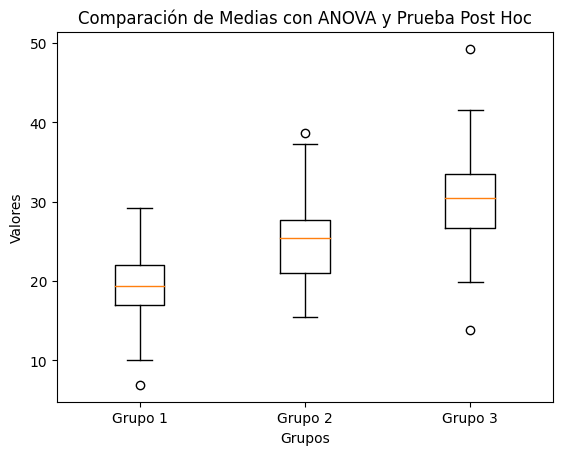

Estadístico F (ANOVA): 121.28597653339587
Valor p (ANOVA): 3.126091806231076e-39

Resultados de Prueba Post Hoc (Tukey):
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj lower   upper  reject
----------------------------------------------------
Grupo 1 Grupo 2   5.6308   0.0 3.9903  7.2712   True
Grupo 1 Grupo 3  10.8437   0.0 9.2033 12.4841   True
Grupo 2 Grupo 3    5.213   0.0 3.5725  6.8534   True
----------------------------------------------------


In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Crear datos ficticios para tres grupos
np.random.seed(42)
grupo1 = np.random.normal(20, 5, 100)
grupo2 = np.random.normal(25, 5, 100)
grupo3 = np.random.normal(30, 5, 100)

# Realizar ANOVA
stat_anova, p_value_anova = stats.f_oneway(grupo1, grupo2, grupo3)

# Realizar prueba post hoc (Tukey)
tukey_results = pairwise_tukeyhsd(np.concatenate([grupo1, grupo2, grupo3]),
                                  np.repeat(['Grupo 1', 'Grupo 2', 'Grupo 3'], 100))

# Visualización en gráfico de caja
plt.boxplot([grupo1, grupo2, grupo3], labels=['Grupo 1', 'Grupo 2', 'Grupo 3'])
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.title('Comparación de Medias con ANOVA y Prueba Post Hoc')
plt.show()

# Imprimir resultados de ANOVA y Tukey
print(f"Estadístico F (ANOVA): {stat_anova}")
print(f"Valor p (ANOVA): {p_value_anova}")
print("\nResultados de Prueba Post Hoc (Tukey):")
print(tukey_results)

En este ejemplo, después de realizar ANOVA, aplicamos la prueba post hoc de Tukey para realizar comparaciones múltiples entre los grupos.

**Interpretación de Resultados:**

- **ANOVA:**

  - Un resultado significativo indica que al menos un grupo es diferente.

- **Tukey:**

  - En la tabla resultante de Tukey, los intervalos de confianza que no incluyen cero indican que hay diferencias significativas entre los grupos correspondientes.

**Visualización Personalizada con Seaborn:**

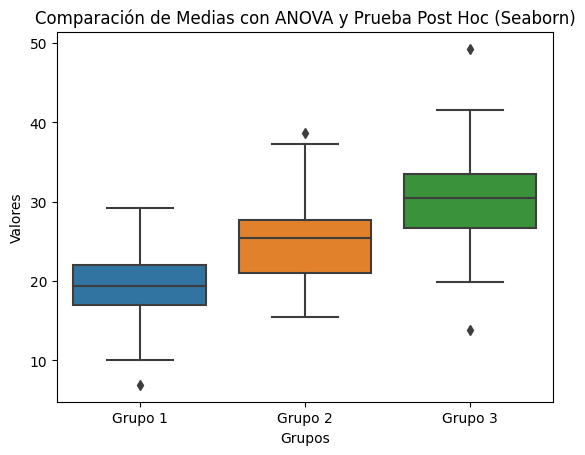

In [4]:
import seaborn as sns

# Crear un DataFrame para facilitar el uso de seaborn
import pandas as pd
df = pd.DataFrame({'Grupo': np.repeat(['Grupo 1', 'Grupo 2', 'Grupo 3'], 100),
                   'Valores': np.concatenate([grupo1, grupo2, grupo3])})

# Visualización con seaborn
sns.boxplot(x='Grupo', y='Valores', data=df)
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.title('Comparación de Medias con ANOVA y Prueba Post Hoc (Seaborn)')
plt.show()

Este ejemplo utiliza Seaborn para crear un gráfico de caja más estilizado.

**Nota sobre Pruebas Post Hoc:**

Diferentes pruebas post hoc pueden ser apropiadas en diferentes situaciones. La prueba de Tukey es una opción común, pero hay otras como la prueba de Bonferroni, la prueba de Scheffé, entre otras. La elección de la prueba post hoc también puede depender de la estructura específica de los datos y de las preguntas de investigación. Es importante considerar el contexto y la naturaleza de tus datos al seleccionar una prueba post hoc.

## **ANOVA de Dos Factores y Diseños Factoriales**

### **Análisis de interacciones**

La ANOVA de dos factores y los diseños factoriales son técnicas estadísticas utilizadas cuando hay dos variables categóricas (factores) y se quiere analizar cómo afectan conjuntamente a una variable continua. El análisis de interacciones examina si el efecto de un factor depende del nivel del otro factor.

**Fórmula y Conceptos Básicos:**

La fórmula general para la ANOVA de dos factores es:

$Y = \mu + A + B + AB + \epsilon$

- $( Y )$ es la variable dependiente.
- $( \mu )$ es la media global.
- $( A )$ es el efecto del factor A.
- $( B )$ es el efecto del factor B.
- $( AB )$ es la interacción entre A y B.
- $( \epsilon )$ es el término de error.

El término de interacción $( AB )$ evalúa si el efecto de un factor es diferente según los niveles del otro factor.

**Ejemplo con Código Python:**

Supongamos que tenemos dos factores: tipo de tratamiento (A: placebo o tratamiento) y duración del tratamiento (B: corto o largo). Queremos analizar su efecto en la variable dependiente (por ejemplo, la respuesta a un medicamento).

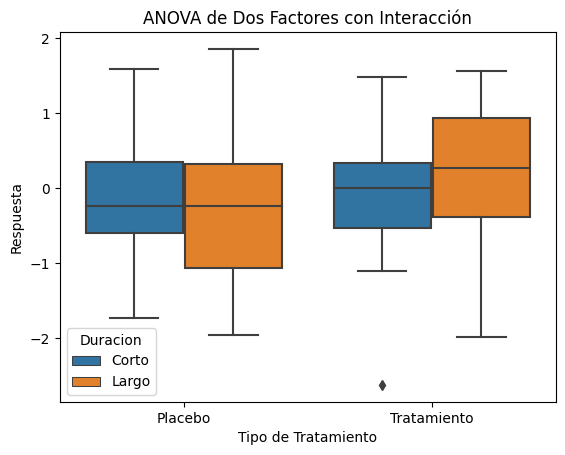

                        df     sum_sq   mean_sq         F    PR(>F)
Tratamiento            1.0   1.479322  1.479322  1.787008  0.184451
Duracion               1.0   0.101309  0.101309  0.122381  0.727233
Tratamiento:Duracion   1.0   0.600806  0.600806  0.725768  0.396379
Residual              96.0  79.470783  0.827821       NaN       NaN


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Crear datos ficticios
np.random.seed(42)
data = pd.DataFrame({'Tratamiento': np.repeat(['Placebo', 'Tratamiento'], 50),
                     'Duracion': np.tile(['Corto', 'Largo'], 50),
                     'Respuesta': np.random.normal(0, 1, 100)})

# Visualización con seaborn
sns.boxplot(x='Tratamiento', y='Respuesta', hue='Duracion', data=data)
plt.xlabel('Tipo de Tratamiento')
plt.ylabel('Respuesta')
plt.title('ANOVA de Dos Factores con Interacción')
plt.show()

# Realizar ANOVA de dos factores con interacción
formula = 'Respuesta ~ Tratamiento * Duracion'
model = ols(formula, data).fit()
anova_table = anova_lm(model)

# Imprimir resultados de ANOVA
print(anova_table)

En este ejemplo, hemos creado datos ficticios con dos factores (tipo de tratamiento y duración del tratamiento) y la variable dependiente (respuesta). El gráfico de caja muestra las distribuciones de la respuesta para cada combinación de niveles de tratamiento y duración.

**Interpretación de Resultados:**

- **ANOVA Table:**

  - La tabla ANOVA proporciona información sobre los efectos principales de cada factor (A y B) y la interacción entre ellos (AB).
  - Un p-valor bajo para la interacción sugiere que hay evidencia de que el efecto de un factor depende del nivel del otro factor.

**Visualización de Interacciones:**

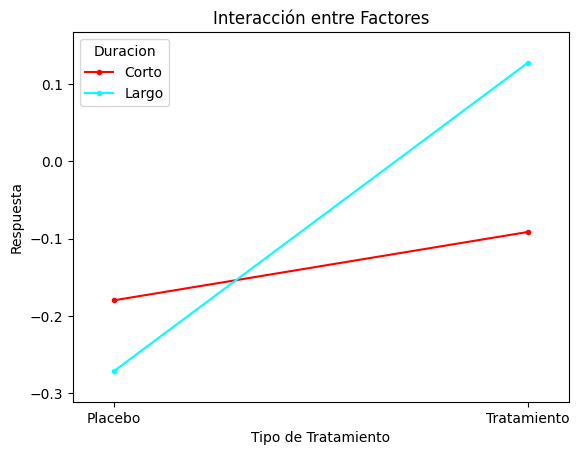

In [6]:
from statsmodels.graphics.factorplots import interaction_plot

# Visualización de la interacción
interaction_plot(x=data['Tratamiento'], trace=data['Duracion'], response=data['Respuesta'])
plt.xlabel('Tipo de Tratamiento')
plt.ylabel('Respuesta')
plt.title('Interacción entre Factores')
plt.show()

Este gráfico de interacción muestra cómo cambia la respuesta en función de los niveles de ambos factores. Si las líneas son paralelas, no hay interacción significativa. Si las líneas no son paralelas, hay una interacción.

**Nota sobre Diseños Factoriales:**

Los diseños factoriales pueden ser más complejos, incluyendo más niveles o factores. En esos casos, el análisis de interacciones se vuelve crucial para comprender cómo los factores interactúan y afectan la variable dependiente.

Es importante adaptar el modelo y la visualización según la naturaleza específica de tus datos y preguntas de investigación. La interpretación de la interacción es clave para entender si los efectos de los factores son independientes o dependientes entre sí.

| **Inicio** | **atrás 7** | **Siguiente 9** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./7_Regresion_y_Correlacion.ipynb)| [⏩](./9_Metodos_Estadisticos_Avanzados.ipynb)|